In [1]:
# Need to restart runtime before this step
import time
import torch
import numpy as np
import scipy.ndimage
import scipy.io
import matplotlib.pyplot as plt
import deepwave
import os
import csv
import sys
from sklearn.feature_extraction import image
from skimage.transform import resize
sys.path.append('./bruges/.')
#sys.path.insert(0,'./bruges/')
from bruges.reflection import reflection as avo
from bruges.filters import wavelets as wav 
from torch.nn.functional import conv1d

In [2]:
vpall = np.load('/disk/student/adhara/Marmousi/elastic-marmousi-model/vpall.npy')
vsall = np.load('/disk/student/adhara/Marmousi/elastic-marmousi-model/vsall.npy')
rhoall = np.load('/disk/student/adhara/Marmousi/elastic-marmousi-model/rhoall.npy')

In [3]:
vptrue = vpall[302:1400,1:250]
vstrue = vsall[302:1400,1:250]
rhotrue = rhoall[302:1400,1:250]
np.max(vptrue)

4.678246

In [4]:
zptrue = vptrue*rhotrue
np.shape(zptrue)

(1098, 249)

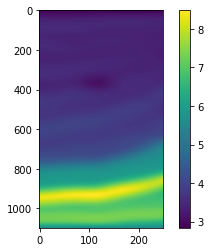

In [5]:
from scipy.signal import filtfilt
nsmoothz, nsmoothx = 60, 50
lowzpall = filtfilt(np.ones(nsmoothz)/float(nsmoothz), 1, zptrue, axis=0)
lowzpall = filtfilt(np.ones(nsmoothx)/float(nsmoothx), 1, lowzpall, axis=1)
plt.imshow(lowzpall,aspect=0.4)
plt.colorbar()

In [6]:
tr1 = zptrue*0
reflectivity = zptrue[:-1,:]*0
for i in range(tr1.shape[1]):
    vp  = vptrue[:,i]
    rho  = rhotrue[:,i]
    vp1 = vp[:-1]
    rho1 = rho[:-1]
    vp2 = vp[1:]
    rho2 = rho[1:]
    reflect = (vp2*rho2 - vp1*rho1)/(vp2*rho2 + vp1*rho1)
    reflect = reflect
    reflectivity[:,i] = reflect
    wavelet = wav.ricker(0.1,2e-3,30)
    wavelet = wavelet*100
    wavelet = torch.tensor(wavelet).unsqueeze(dim=0).unsqueeze(dim=0).float()
    reflect = torch.tensor(reflect).unsqueeze(dim=0).float()
    reflect = torch.unsqueeze(reflect,dim=0)
    print("shape of reflect :", np.shape(reflect))
    synth = conv1d(reflect, wavelet, padding=int(wavelet.shape[-1] / 2))
    print("shape of synth :", np.shape(synth))
    tr1[:,i] = synth[0,0,:].numpy()

/disk/student/adhara/anaconda3/envs/deepwave2/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: In future releases, return_t will be True by default.
  del sys.path[0]
./bruges/./bruges/filters/wavelets.py:272: FutureWarning: In future releases, the default legacy behaviour will be removed. We recommend setting sym=True. This will be the default in v0.5+.
  t = _get_time(duration, dt, sym=sym)


shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of s

shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of ref

shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of reflect : torch.Size([1, 1, 1097])
shape of synth : torch.Size([1, 1, 1098])
shape of ref

In [7]:
np.shape(tr1)

(1098, 249)

In [8]:
np.shape(vptrue)

(1098, 249)

/disk/student/adhara/anaconda3/envs/deepwave2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In future releases, return_t will be True by default.
  """Entry point for launching an IPython kernel.


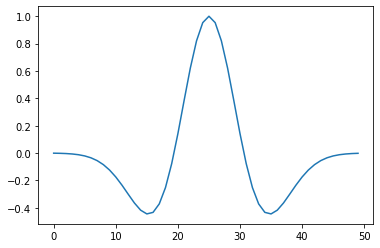

In [9]:
wavelet = wav.ricker(0.1,2e-3,20)
plt.plot(wavelet)

In [10]:
np.shape(reflect)

torch.Size([1, 1, 1097])

In [11]:
np.min(reflectivity)

-0.36831617

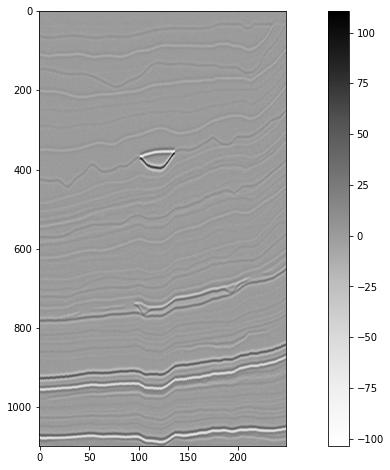

In [12]:
tr1 = tr1 + np.random.normal(tr1,0.5*np.std(tr1))
fig = plt.figure(figsize=(15,8))
plt.imshow(tr1,cmap='Greys',aspect=0.4)
plt.colorbar()


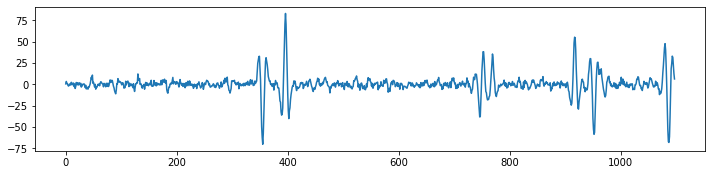

In [13]:
rows = 3
columns = 1
fig1 = plt.figure(figsize=(12,9))

ax = fig1.add_subplot(rows,columns,1)
plt.plot(tr1[:,120])

In [14]:
np.max(reflectivity)

0.46240544

In [15]:
np.min(reflectivity)

-0.36831617

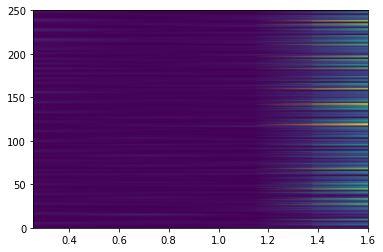

In [16]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
f, t, Sxx = signal.spectrogram(reflectivity[:,150], 500)
plt.pcolormesh(t, f, Sxx, shading='gouraud')

In [17]:
np.shape(tr1)

(1098, 249)

In [18]:
np.max(reflectivity)

0.46240544

In [19]:
np.argwhere(np.isnan(reflectivity))

array([], shape=(0, 2), dtype=int64)

In [20]:
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/')

          
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainA')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainB')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainC')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainD')

os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testA')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testB')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testC')
os.system('rm -rf /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testD')

os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainA')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainB')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainC')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainD')

os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testA')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testB')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testC')
os.system('mkdir /disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testD')

0

In [21]:
np.shape(reflectivity)

(1097, 249)

In [22]:
np.shape(tr1)
tr1 = np.expand_dims(tr1, 0)
#np.shape(tr1)

In [23]:
np.shape(reflectivity)

(1097, 249)

In [24]:
#seis = seis.swapaxes(0,1)
#mat3 = 2200*np.ones(np.shape(mat))
#mat3[0:26,:] = 1500
A = tr1
B = zptrue
C = lowzpall

for kk in range(1,2):
    
    #kk = 1
    D = torch.randn([1,8])
            
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()

    
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()


    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainC/'+str(kk)+'.npy','wb')
    np.save(file,C)
    file.close()

    
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/trainD/'+str(kk)+'.npy','wb')
    np.save(file,D)
    file.close()

In [25]:
for kk in range(150,151):
    
    #kk = 1
    #D = np.load('/disk/student/adhara/Fall2021/PhysicsBasedFWI/marmousi/ZZConstant0ep'+str(kk)+'.npy')
            
    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testA/'+str(kk)+'.npy','wb')
    np.save(file,A)
    file.close()
    

    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testB/'+str(kk)+'.npy','wb')
    np.save(file,B)
    file.close()


    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testC/'+str(kk)+'.npy','wb')
    np.save(file,C)
    file.close()
    

    file = open('/disk/student/adhara/Fall2021/FCNVMB-Deep-learning-based-seismic-velocity-model-building/MarmousiI/testD/'+str(kk)+'.npy','wb')
    np.save(file,D)
    file.close()

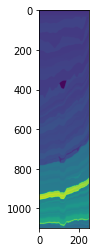

In [26]:
inverted = np.load('/disk/student/adhara/Fall2021/PhysicsBasedFWI/marmousi2/FakeAD0ep4000.npy')
inverted = inverted[0,0,:,:]
real = np.load('/disk/student/adhara/Fall2021/PhysicsBasedFWI/marmousi2/RealAD0ep4000.npy')
real = real[0,0,:,:]
plt.imshow(real)

Text(0.5, 1.0, 'low frequency')

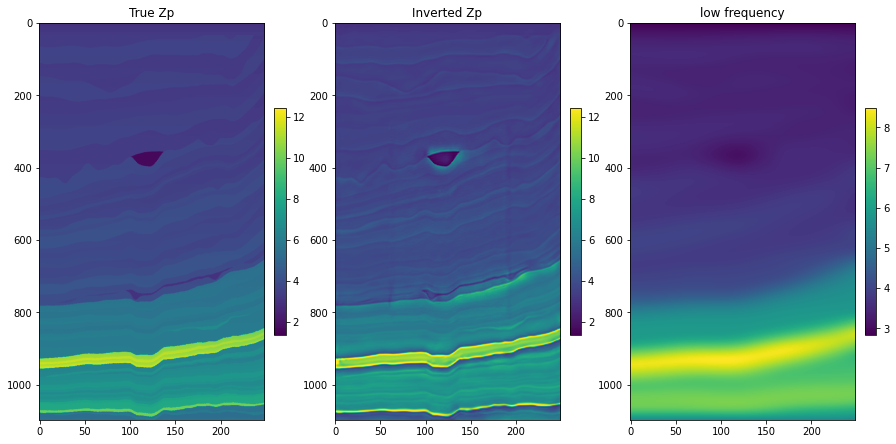

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
#fake = np.load('inverted_zp.npy')
fig = plt.figure(figsize=(15,24))
ax1 = plt.subplot(1,3,1)
im = ax1.imshow(real,aspect=0.4)
ax1.set_title('True Zp')
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, fraction=0.046, pad=0.04)

ax2 = plt.subplot(1,3,2)
im = ax2.imshow(inverted,aspect=0.4,vmin=np.min(real),vmax=np.max(real))
plt.colorbar(im, fraction=0.046, pad=0.04)
ax2.set_title('Inverted Zp')

ax3 = plt.subplot(1,3,3)
im = ax3.imshow(lowzpall,aspect=0.4)
plt.colorbar(im, fraction=0.046, pad=0.04)
ax3.set_title('low frequency')

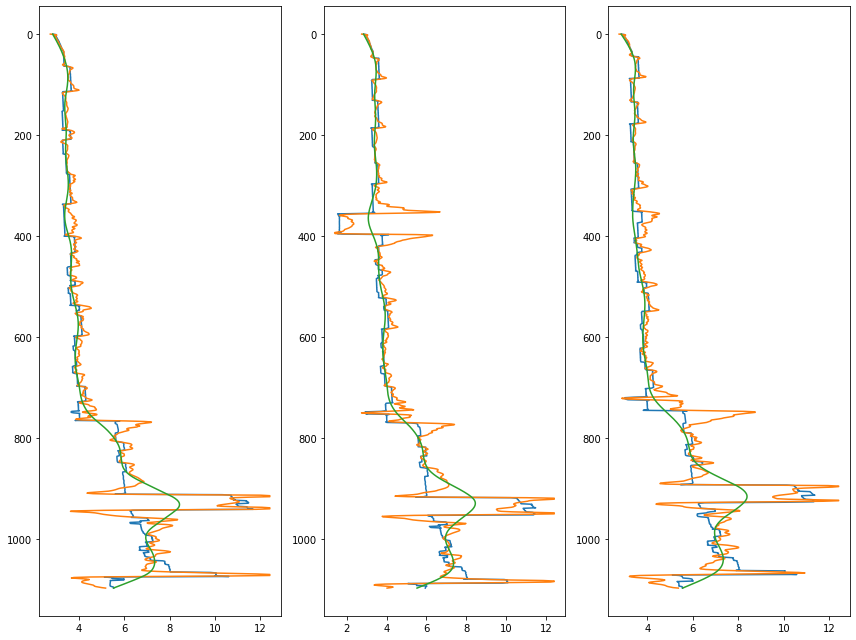

In [28]:
rows = 1
columns = 3
zpall = real
fake = inverted

x = np.arange(0,1098,1)
fig1 = plt.figure(figsize=(12,9))

ax = fig1.add_subplot(rows,columns,1)
im = plt.plot(zpall[:,75],x)
im = plt.plot(fake[:,75],x)
im = plt.plot(lowzpall[:,75],x)
plt.tight_layout()

ax = plt.gca(); ax.invert_yaxis()

ax = fig1.add_subplot(rows,columns,2)
im = plt.plot(zpall[:,120],x)
im = plt.plot(fake[:,120],x)
im = plt.plot(lowzpall[:,120],x)
plt.tight_layout()
ax = plt.gca(); ax.invert_yaxis()

ax = fig1.add_subplot(rows,columns,3)
im = plt.plot(zpall[:,150],x)
im = plt.plot(fake[:,150],x)
im = plt.plot(lowzpall[:,150],x)
plt.tight_layout()
ax = plt.gca(); ax.invert_yaxis()

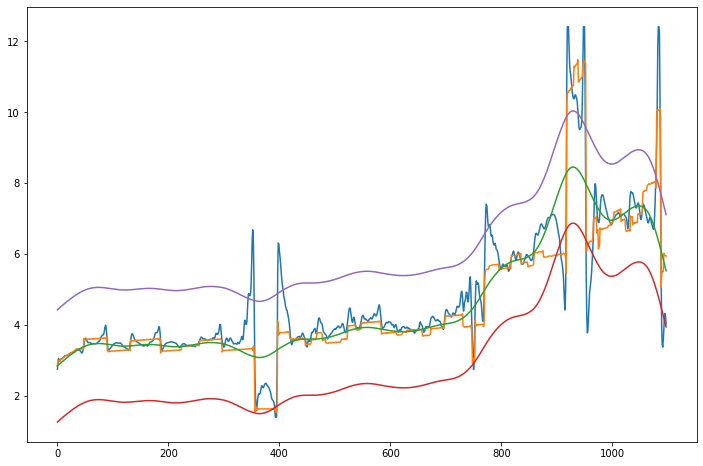

In [29]:
plt.figure(figsize=(12,8))
plt.plot(inverted[:,120])
plt.plot(real[:,120])
plt.plot(lowzpall[:,120])
plt.plot(lowzpall[:,120]-np.std(lowzpall[:,120]))
plt.plot(lowzpall[:,120]+np.std(lowzpall[:,120]))

In [30]:
np.shape(real)

(1098, 249)

In [31]:
matVel = np.zeros((25,1098,249))
matVel2 = np.zeros((25,1098,249))
for k in range(25):
    filename='/disk/student/adhara/Fall2021/ImpedanceOutput/Output'+str(k)+'/'    
    #fig.add_subplot(rows,columns,i+1)
    #kk=starting+i
    onefilef = filename+'150_fake_BT.npy'
    mat=np.load(onefilef)
    mat = mat
    matVel[k,:,:] = mat
    twofilef = filename+'150_var_BT.npy'
    mat = np.load(twofilef)
    mat = mat
    matVel2[k,:,:] = mat
        
mean = np.mean(matVel, axis=0)
epi = np.var(matVel, axis=0)
ale = np.mean(matVel2, axis=0)

In [32]:
np.shape(mean)

(1098, 249)

Text(0.5, 1.0, 'low frequency')

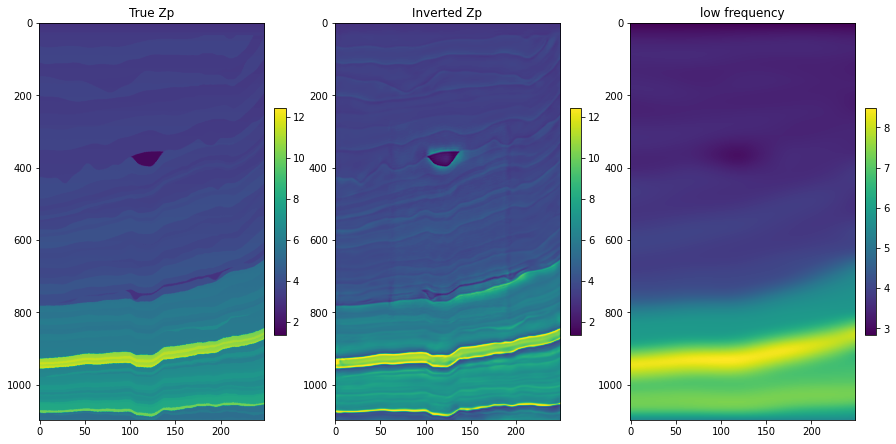

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
#fake = np.load('inverted_zp.npy')
fig = plt.figure(figsize=(15,24))
ax1 = plt.subplot(1,3,1)
im = ax1.imshow(real,aspect=0.4)
ax1.set_title('True Zp')
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, fraction=0.046, pad=0.04)

ax2 = plt.subplot(1,3,2)
im = ax2.imshow(mean,aspect=0.4,vmin=np.min(real),vmax=np.max(real))
plt.colorbar(im, fraction=0.046, pad=0.04)
ax2.set_title('Inverted Zp')

ax3 = plt.subplot(1,3,3)
im = ax3.imshow(lowzpall,aspect=0.4)
plt.colorbar(im, fraction=0.046, pad=0.04)
ax3.set_title('low frequency')

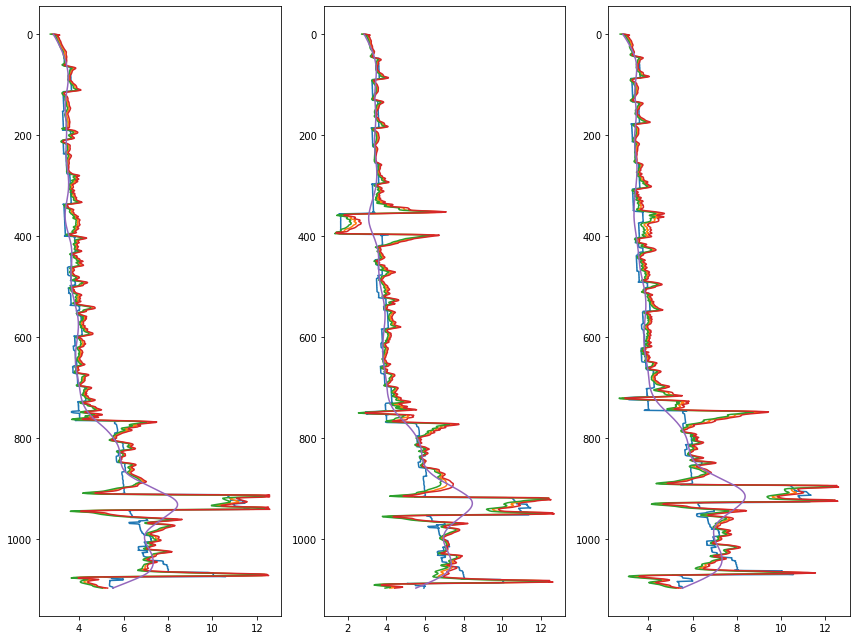

In [36]:
rows = 1
columns = 3
zpall = real
fake = inverted

x = np.arange(0,1098,1)
fig1 = plt.figure(figsize=(12,9))

ax = fig1.add_subplot(rows,columns,1)
im = plt.plot(zpall[:,75],x)
im = plt.plot(mean[:,75],x)
im = plt.plot(mean[:,75]-2*np.sqrt(epi[:,75]),x)
im = plt.plot(mean[:,75]+2*np.sqrt(epi[:,75]),x)
im = plt.plot(lowzpall[:,75],x)
plt.tight_layout()

ax = plt.gca(); ax.invert_yaxis()

ax = fig1.add_subplot(rows,columns,2)
im = plt.plot(zpall[:,120],x)
im = plt.plot(mean[:,120],x)
im = plt.plot(mean[:,120]-2*np.sqrt(epi[:,120]),x)
im = plt.plot(mean[:,120]+2*np.sqrt(epi[:,120]),x)
im = plt.plot(lowzpall[:,120],x)
plt.tight_layout()
ax = plt.gca(); ax.invert_yaxis()

ax = fig1.add_subplot(rows,columns,3)
im = plt.plot(zpall[:,150],x)
im = plt.plot(mean[:,150],x)
im = plt.plot(mean[:,150]-2*np.sqrt(epi[:,150]),x)
im = plt.plot(mean[:,150]+2*np.sqrt(epi[:,150]),x)
im = plt.plot(lowzpall[:,150],x)
plt.tight_layout()
ax = plt.gca(); ax.invert_yaxis()

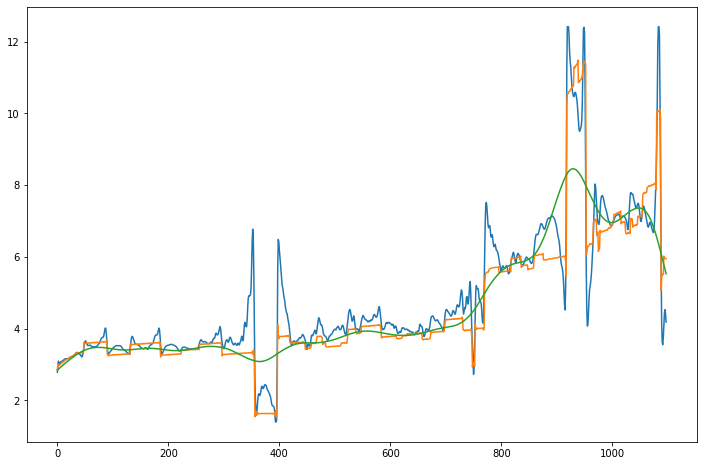

In [146]:
plt.figure(figsize=(12,8))
plt.plot(mean[:,120])
plt.plot(real[:,120])
plt.plot(lowzpall[:,120])
#plt.plot(lowzpall[:,120]-np.std(lowzpall[:,120]))
#plt.plot(lowzpall[:,120]+np.std(lowzpall[:,120]))

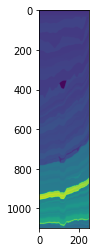

In [30]:
plt.imshow(B)

In [31]:
np.shape(B)

(1098, 249)

In [32]:
sampling_rate = 500
data = tr1[0,:,500]
ft = np.fft.rfft(data)
aft = np.abs(ft)
frequency = np.linspace(0,sampling_rate/2,len(aft))
fig = plt.figure(figsize=(15,8))
plt.plot(frequency,aft)

IndexError: index 500 is out of bounds for axis 2 with size 249

In [ ]:
from scipy import fftpack

In [ ]:
np.shape(tr1)

In [ ]:
X = fftpack.fft(tr1[0,:,500])
freqs = fftpack.fftfreq(len(tr1[0,:,500])) * 500



In [ ]:
fake = np.load('/disk/student/adhara/Fall2021/PhysicsBasedFWI/marmousi2/FakeAD0ep1374.npy')

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.imshow(fake[0,0,:,:],cmap='Greys',vmin=-50.0,vmax=50.0,aspect=0.4)
plt.colorbar()

In [ ]:
sampling_rate = 500
data = fake[0,0,:,500]
ft = np.fft.rfft(data)
aft = np.abs(ft)
frequency = np.linspace(0,sampling_rate/2,len(aft))
fig = plt.figure(figsize=(15,8))
plt.plot(frequency,aft)

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.imshow(reflectivity,cmap='Greys',vmin=-100.0, vmax=100.0, aspect=0.4)
plt.colorbar()

In [ ]:
diff = fake[0,0,:,:] - reflectivity
fig = plt.figure(figsize=(15,8))
plt.imshow(diff,cmap='Greys', vmin=-100.0, vmax=100.0, aspect=0.4)
plt.colorbar()